# Contents
[Supervised Machine Learning Algorithms](#Supervised-Machine-Learning-Algorithms)  
 
- [1. Using Dependent and Independent Features](#1.-Using-Dependent-and-Independent-Features)  
   - [1.1 Linear Regression](#1.1-Linear-Regression)
   - [1.2 Ridge Regression](#1.2-Ridge-Regression)
   - [1.3 Lasso Regression](#1.3-Lasso-Regression)
- [2. Using train, test data](#2.-Using-train,-test-data)
   - [2.1 Linear Regression](#2.1-Linear-Regression)
   - [2.2 Ridge Regression](#2.2-Ridge-Regression)
   - [2.3 Lasso Regression](#2.3-Lasso-Regression)
- [3. Regression Predictions](#3.-Prediction)
- [4. Logistic Regression](#4.-Logistic-Regression)
   - [4.1 Logistic Prediction](#4.1-Prediction)
- [5. Decision Tree](#5.-Decision-Tree)
- [6. Support vector machine](#6.-Support-Vector-Machine)
   - [6.1 Polynomial Kernel](#6.1-Polynomial-Kernel)
   
[Unsupervised Machine Learning Algorithm](#Unsupervised-Machine-Learning-Algorithms)
- [1. K means Clustering](#1.-K-means-Clustering)
- [2. DB Scan](#2.-DB-Scan)

[Dimensionality Reduction](#Dimensionality-Reduction)
- [Principle Component Analysis](#Principle-Component-Analysis)

[Additional Infos](#Additional-Information)

# Supervised Machine Learning Algorithms

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [13]:
# importing the dataset

df = pd.read_csv(r"F:\datasets\boston house price.csv")
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [16]:
# changing the name of the target feature 

df.rename (columns={'MEDV':'Price'},inplace = True)

In [17]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

In [29]:
# dividing the feature into independent and dependent features 

x = df.iloc[:,:13]     # independent feature 
y = df.iloc[:,-1]      # dependent feature 
y = pd.DataFrame(y)

In [30]:
x.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [31]:
y

Price
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]

# 1. Using Dependent and Independent Features
# 1.1 Linear Regression 

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
mse = cross_val_score(lin_reg, x, y, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.13180746769895


# ---------------------------------------------------------------------------------------------------------------

# 1.2 Ridge Regression

In [38]:
from sklearn.linear_model import Ridge  
from sklearn.model_selection import GridSearchCV
ridge = Ridge()

params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [41]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)       

{'alpha': 20}
-32.38025025182513


- compare the mse of both linear regression and ridge regression.  
- From -37 it has decreased to -32.
- The value of mse should go towards zero. 

In [54]:
# Ridge regression with more parameters of alpha 

from sklearn.linear_model import Ridge  
from sklearn.model_selection import GridSearchCV
ridge_1 = Ridge()

params_1 = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

ridge_regressor_1 = GridSearchCV(ridge_1, params, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor_1.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [55]:
print(ridge_regressor_1.best_params_)
print(ridge_regressor_1.best_score_)

{'alpha': 100}
-29.905701947540308


# ---------------------------------------------------------------------------------------------------------------

- Now the mse has decresed from -32 to -29

# 1.3 Lasso Regression

In [59]:
from sklearn.linear_model import Lasso  
from sklearn.model_selection import GridSearchCV
lasso = Lasso()

params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, params, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [60]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.53158022069486


In [61]:
# Lasso regression with more alpha parameters

from sklearn.linear_model import Lasso  
from sklearn.model_selection import GridSearchCV
lasso_2 = Lasso()

params_2 = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor_2 = GridSearchCV(lasso_2, params_2, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor_2.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [62]:
print(lasso_regressor_2.best_params_)
print(lasso_regressor_2.best_score_)

{'alpha': 1}
-35.53158022069486


- There is no change in the mse for lasso regression even after adding more parameters.

# ---------------------------------------------------------------------------------------------------------------

[Go to Contents](#Contents)

# 2. Using train, test data
# 2.1 Linear Regression 

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 43)

In [74]:
# linear regression 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lrg = LinearRegression()
lrg.fit(x_train, y_train)
mse = cross_val_score(lrg, x_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse_2 = np.mean(mse)
print(mean_mse_2)

-24.267791177623565


# ---------------------------------------------------------------------------------------------------------------

# 2.2 Ridge Regression 

In [64]:
from sklearn.linear_model import Ridge 
from sklearn.model_selection import GridSearchCV
ridge_3 = Ridge()
params_3 = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
                     
ridge_regressor_3 = GridSearchCV(ridge_3, params_3, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [66]:
print(ridge_regressor_3.best_params_)
print(ridge_regressor_3.best_score_)

{'alpha': 0.01}
-24.2641172570913


# ---------------------------------------------------------------------------------------------------------------

# 2.3 Lasso Regression 

In [70]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso_3 = Lasso()
params_4 = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}

lasso_regressor_3 = GridSearchCV(lasso_3, params_4, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor_3.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [71]:
print(lasso_regressor_3.best_params_)
print(lasso_regressor_3.best_score_)

{'alpha': 0.001}
-24.265247564237402


# ---------------------------------------------------------------------------------------------------------------

[Go to Contents](#Contents)

# 3. Prediction

In [75]:
linear_y_predict = lrg.predict(x_test)
from sklearn.metrics import r2_score

r2_1 = r2_score(linear_y_predict, y_test)
print(r2_1)

0.6823078984777431


In [73]:
lasso_y_predict = lasso_regressor_3.predict(x_test)
from sklearn.metrics import r2_score

r2 = r2_score(lasso_y_predict, y_test)
print(r2)

0.6821168382779579


# ---------------------------------------------------------------------------------------------------------------

# 4. Logistic Regression

In [4]:
# loading dataset

df_1 = load_breast_cancer()
df_1       # independent and dependent features are in different keys 

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

In [83]:
# independent features
cancer_x = pd.DataFrame(df_1['data'], columns = df_1['feature_names'])
cancer_x.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [87]:
# dependent feature

cancer_y = pd.DataFrame(df_1['target'], columns = ["target"])
cancer_y.head()

target
0       0
1       0
2       0
3       0
4       0

In [89]:
cancer_y.size

569

In [90]:
cancer_x.size

17070

In [92]:
# checking whether the target feature is balanced or not

cancer_y['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [93]:
# train, test split

from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(cancer_x, cancer_y, test_size = 0.33, random_state = 42)

In [96]:
params = [{'C': [1, 5, 10]}, {'max_iter': [100, 150]}]       # max_iter is for gridsearchcv

In [101]:
log = LogisticRegression(C = 100, max_iter = 100)
log_model = GridSearchCV(log, param_grid = params, scoring = 'f1', cv = 5)
log_model.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [102]:
print(log_model.best_params_)
print(log_model.best_score_)

{'C': 10}
0.9555971738458219


In [103]:
log_y_predict = log_model.predict(x_test1)

# ---------------------------------------------------------------------------------------------------------------

# 4.1 Logistic Prediction

In [106]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

confusion_matrix(y_test1, log_y_predict)

array([[ 63,   4],
       [  3, 118]], dtype=int64)

In [107]:
accuracy_score(y_test1, log_y_predict)

0.9627659574468085

In [108]:
print(classification_report(y_test1, log_y_predict))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



# ---------------------------------------------------------------------------------------------------------------
[Go to Contents](#Contents)

# 5. Decision Tree

In [5]:
# loading dataset

from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [123]:
# independent features 

x_iris = pd.DataFrame(iris['data'], columns = iris['feature_names'])
x_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [145]:
# dependent feature
 
y_iris = pd.DataFrame(iris['target'], columns=['target'])
y_iris.head()

target
0       0
1       0
2       0
3       0
4       0

In [146]:
y_iris.value_counts()

target
0         50
1         50
2         50
dtype: int64

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
d_classi = DecisionTreeClassifier()
d_classi.fit(x_iris, y_iris)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

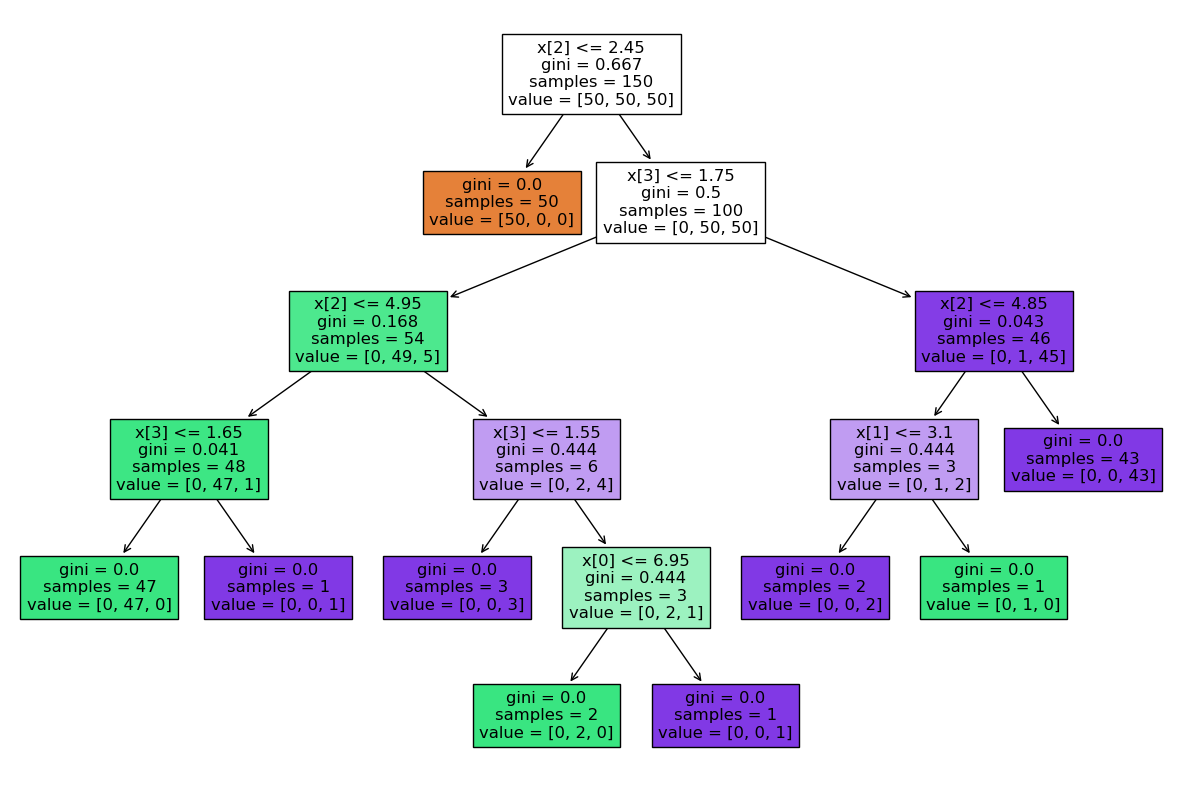

In [142]:
plt.figure(figsize = (15,10))
tree.plot_tree(d_classi, filled = True)

# ---------------------------------------------------------------------------------------------------------------

- In the above decision tree we can stop the branches at the 3rd branch itself.

# 6. Support Vector Machine

In [1]:
# data preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)
y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [2]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

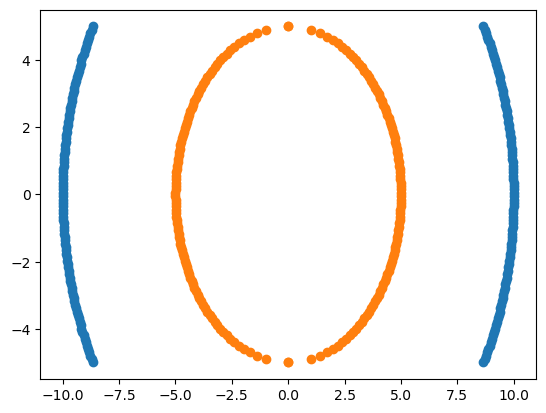

In [3]:
plt.scatter(y, x)
plt.scatter(y1, x1)

In [4]:
# creating dataframes

df1 = pd.DataFrame(np.vstack([y, x]).T, columns = ['X1','X2'])
df1['Y'] = 0

df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns = ['X1', 'X2'])
df2['Y'] = 1

df = df1.append(df2)
df.head()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_5936\3842590324.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


X1       X2  Y
0  8.660254 -5.00000  0
1  8.717792 -4.89899  0
2  8.773790 -4.79798  0
3  8.828277 -4.69697  0
4  8.881281 -4.59596  0

In [5]:
# independent and dependent features 

x = df.iloc[:, :2]
y = df.Y

print(x.head())
print()
print(y.head())

         X1       X2
0  8.660254 -5.00000
1  8.717792 -4.89899
2  8.773790 -4.79798
3  8.828277 -4.69697
4  8.881281 -4.59596

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64


In [6]:
# train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [9]:
# importing library

from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear')
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [10]:
y_pred = svm_classifier.predict(x_test)

In [11]:
# checking accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.44166666666666665

- The accuracy score is pretty low. It is because the data is a **non-linearly separable** data.
- We cannot draw a best fit line in such type of data.  
&nbsp;  
- Therefore we should use **SVM Kernels** which convert non-linearly separable into linearly separable data. 
- It transforms lower dimension into higher dimension.

# 6.1 Polynomial Kernel

In [14]:
# finding the important components for the polynomial kernels
# x1, x2, x1_square, x2_square, x1*x2

df['X1_square'] = df['X1']**2
df['X2_square'] = df['X2']**2
df['X1*X2'] = df['X1'] * df['X2']

df.head()

X1       X2  Y  X1_square  X2_square      X1*X2
0  8.660254 -5.00000  0  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  0  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  0  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  0  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  0  78.877155  21.122845 -40.818009

In [20]:
# independent and dependent feature

x1 = df[['X1', 'X2', 'X1_square', 'X2_square', 'X1*X2']]
y1 = df['Y']

print(x1.head())
print()
print(y1.head())

         X1       X2  X1_square  X2_square      X1*X2
0  8.660254 -5.00000  75.000000  25.000000 -43.301270
1  8.717792 -4.89899  75.999898  24.000102 -42.708375
2  8.773790 -4.79798  76.979390  23.020610 -42.096467
3  8.828277 -4.69697  77.938476  22.061524 -41.466150
4  8.881281 -4.59596  78.877155  21.122845 -40.818009

0    0
1    0
2    0
3    0
4    0
Name: Y, dtype: int64


In [21]:
# train and test split

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.3, random_state = 0)

In [22]:
print(x1_train)
print()
print(x1_test)

           X1        X2  X1_square  X2_square      X1*X2
92   9.031653  4.292929  81.570758  18.429242  38.772248
23   4.223140 -2.676768  17.834915   7.165085 -11.304366
34   4.748549 -1.565657  22.548720   2.451280  -7.434597
32   4.677106 -1.767677  21.875319   3.124681  -8.267611
177 -4.157397 -2.777778  17.283951   7.716049  11.548325
..        ...       ...        ...        ...        ...
123 -4.223140  2.676768  17.834915   7.165085 -11.304366
192 -9.031653 -4.292929  81.570758  18.429242  38.772248
117 -9.445795  3.282828  89.223038  10.776962 -31.008922
47   9.996811 -0.252525  99.936231   0.063769  -2.524447
172 -9.738311 -2.272727  94.834711   5.165289  22.132526

[280 rows x 5 columns]

           X1        X2  X1_square  X2_square      X1*X2
132 -9.842526  1.767677  96.875319   3.124681 -17.398405
109 -2.874798  4.090909   8.264463  16.735537 -11.760537
141 -4.925731  0.858586  24.262830   0.737170  -4.229163
196 -8.828277 -4.696970  77.938476  22.061524  41.466150
46   4

In [23]:
print(y1_train)
print()
print(y1_test)

92     0
23     1
34     1
32     1
177    1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 280, dtype: int64

132    0
109    1
141    1
196    0
46     1
      ..
16     1
59     1
49     0
38     1
143    1
Name: Y, Length: 120, dtype: int64


In [24]:
import plotly.express as px
fig = px.scatter_3d(df, x = 'X1', y = 'X2', z = 'X1*X2', color = 'Y')
fig.show()

- The above output is the 3D visualization of the new dataframe which contain **X1, X2, X1*X2**.
- It is clear that we cannot create a hyper plane which separates the two classes. 
- Blue datapoints are present in both the sides. It has to be present in any one side to be easily separated.
- Observe the axis of the graph it contains only 3 features it does not contain **X1_square and X2_square**.

In [25]:
fig = px.scatter_3d(df, x = 'X1_square', y = 'X2_square', z = 'X1*X2', color = 'Y')
fig.show()

- The above output is the 3D visualization of the dataframe which contain **X1_square, X2_square and X1*X2**
- We can create a hyper plane in the middle of both the blue and yellow datapoints which perfectly separates the two classes.
- Observe the axis of the graphs.

In [26]:
# creating model
svm1_classifier = SVC(kernel = 'linear')
svm1_classifier.fit(x1_train, y1_train)

# prediction
y1_pred = svm1_classifier.predict(x1_test)

# accuracy
accuracy_score(y1_test, y1_pred)

1.0

- In the about scenarios we have created the new features i.2 **X1_square and X2_square and X1*X2** manually. 
- When using **poly or rbf** as kernels it will create the new features automatically in the background.

[Go to Contents](#Contents)

# Unsupervised Machine Learning Algorithms

# 1. K means Clustering

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [24]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

In [25]:
X

array([[-6.92324165e+00, -1.06695320e+01],
       [-8.63062033e+00, -7.13940564e+00],
       [-9.63048069e+00, -2.72044935e+00],
       [-2.30647659e+00,  5.30797676e+00],
       [-7.57005366e+00, -3.01446491e+00],
       [-1.00051011e+00,  2.77905153e+00],
       [-4.81826839e+00, -2.77214822e+00],
       [-5.33964799e+00, -1.27625764e+00],
       [-7.94308840e+00, -3.89993901e+00],
       [-5.54924525e+00, -3.41298968e+00],
       [-5.14508990e+00, -9.54492198e+00],
       [-7.09669936e+00, -8.04074036e+00],
       [-5.82641512e+00, -1.96346196e+00],
       [-1.83198811e+00,  3.52863145e+00],
       [-7.34267235e+00, -3.16546482e+00],
       [-7.34072825e+00, -6.92427252e+00],
       [-7.94653906e+00, -3.36768655e+00],
       [-8.24598536e+00, -8.61315821e+00],
       [-1.98197711e+00,  4.02243551e+00],
       [-4.35098035e+00, -3.69476678e+00],
       [-1.04768696e+01, -3.60318139e+00],
       [-1.10195984e+01, -3.15882031e+00],
       [-5.17255904e+00, -4.31835971e+00],
       [-2.

In [26]:
y

array([2, 2, 1, 0, 3, 0, 3, 3, 1, 3, 2, 2, 3, 0, 3, 2, 1, 2, 0, 3, 1, 1,
       3, 0, 3, 3, 0, 0, 1, 3, 2, 0, 3, 2, 3, 2, 1, 1, 2, 1, 3, 1, 0, 3,
       3, 2, 1, 3, 0, 0, 0, 1, 1, 3, 2, 1, 1, 1, 1, 3, 0, 0, 1, 3, 0, 3,
       2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 3, 0, 2, 2, 3, 2, 0, 0, 2, 0, 1, 0, 3, 3, 0, 0, 1,
       3, 2, 0, 1, 0, 1, 0, 3, 0, 3, 1, 2, 2, 1, 3, 1, 0, 2, 2, 3, 0, 1,
       1, 1, 1, 2, 0, 3, 0, 0, 3, 2, 3, 0, 0, 0, 3, 3, 2, 2, 1, 1, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 2, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 0, 2, 2, 1, 3, 2, 2, 3, 0, 0, 2, 2, 3, 0, 3, 2,
       2, 0, 2, 1, 0, 3, 3, 2, 3, 1, 2, 3, 1, 3, 1, 2, 3, 3, 3, 0, 1, 0,
       3, 2, 1, 3, 1, 1, 1, 0, 3, 0, 2, 1, 2, 1, 0, 0, 1, 2, 0, 2, 3, 1,
       2, 2, 2, 2, 3, 1, 2, 1, 3, 0, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 1,
       0, 3, 2, 2, 1, 1, 1, 3, 0, 0, 3, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 0,
       0, 3, 1, 1, 1, 3, 3, 3, 2, 0, 2, 1, 2, 3, 2,

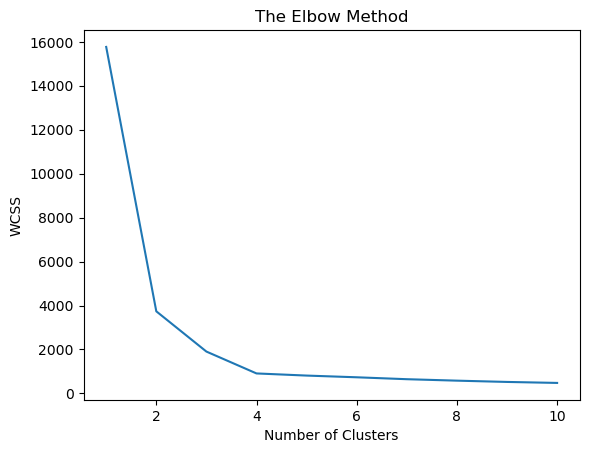

In [27]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


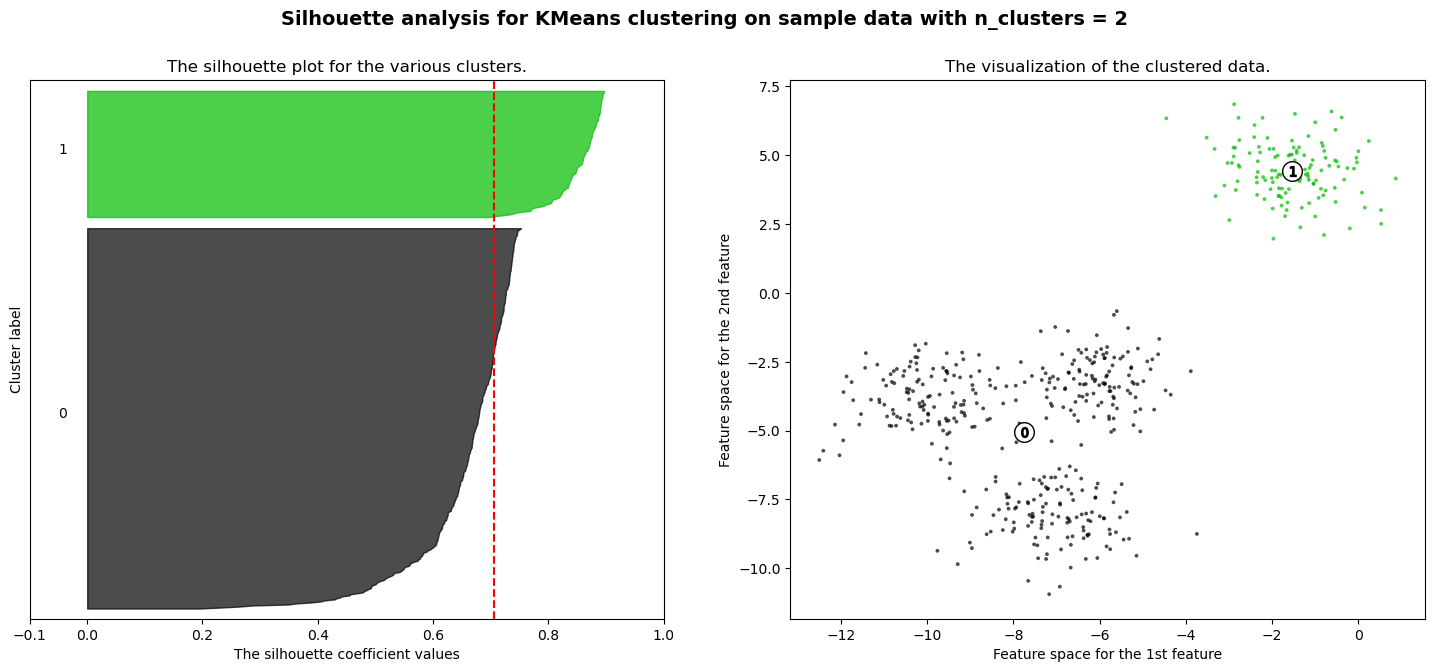

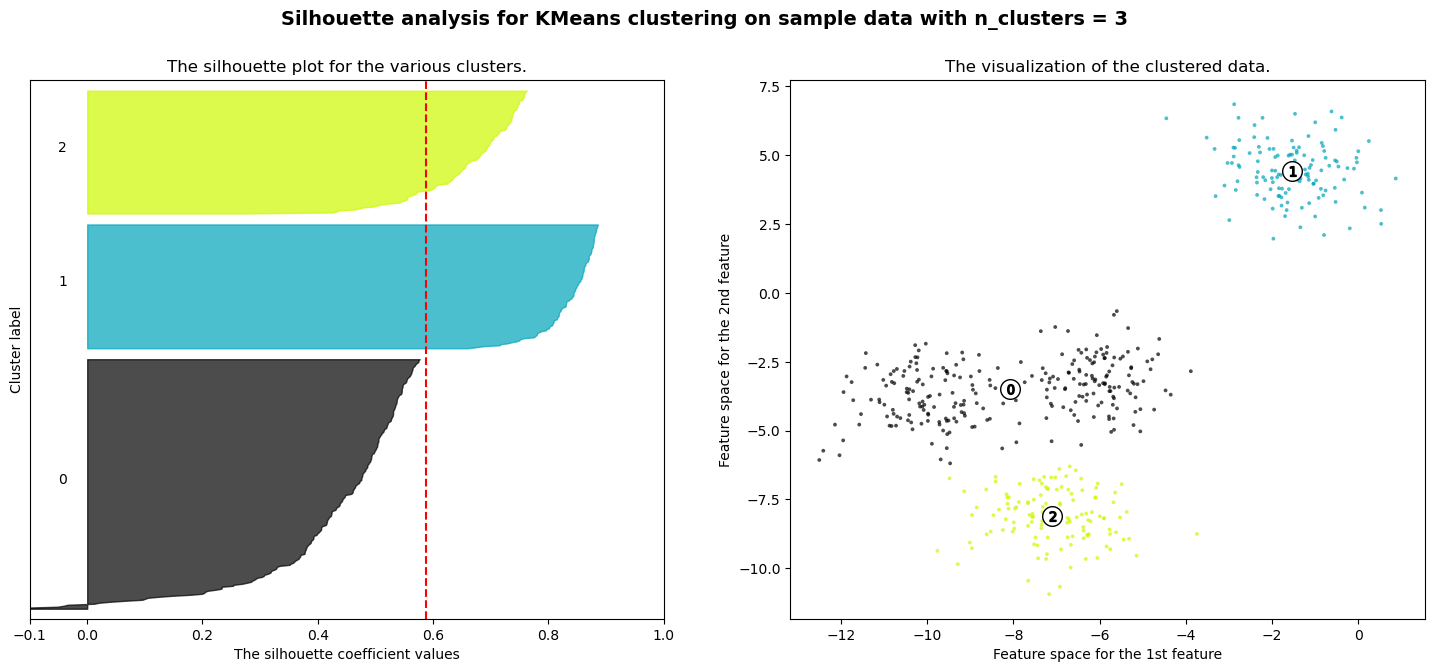

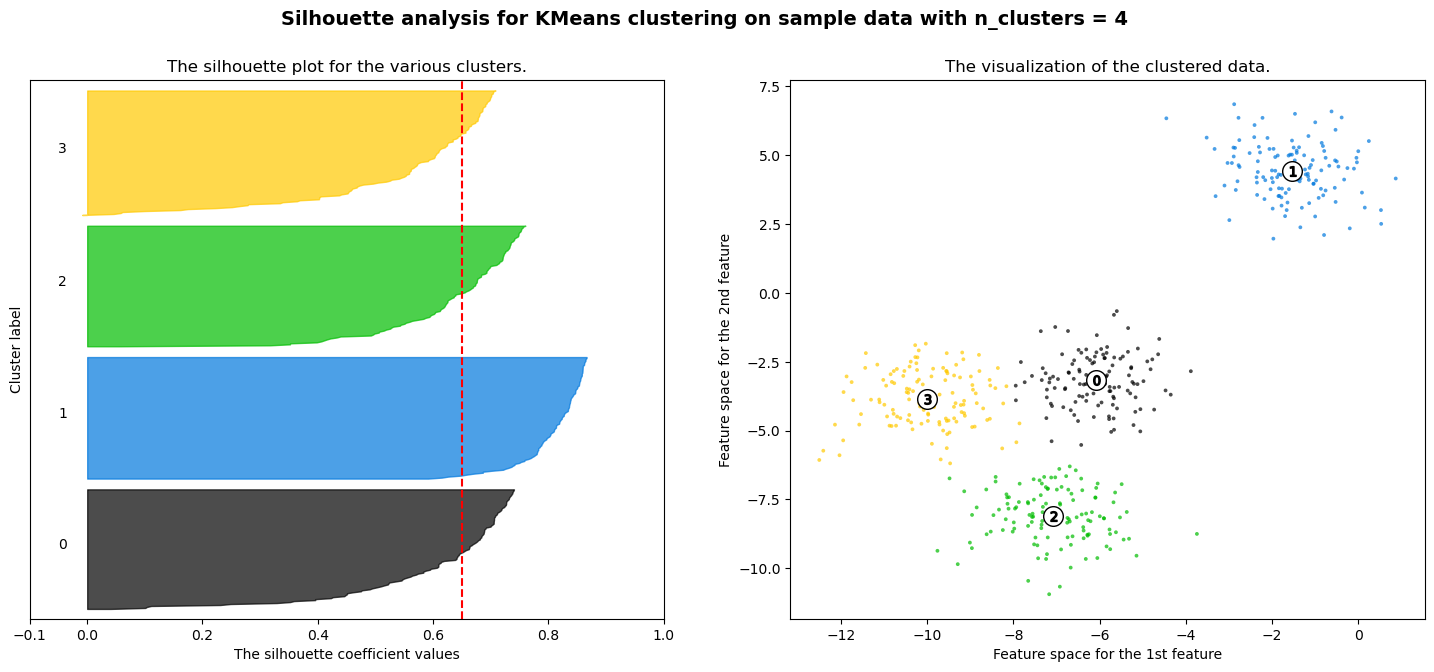

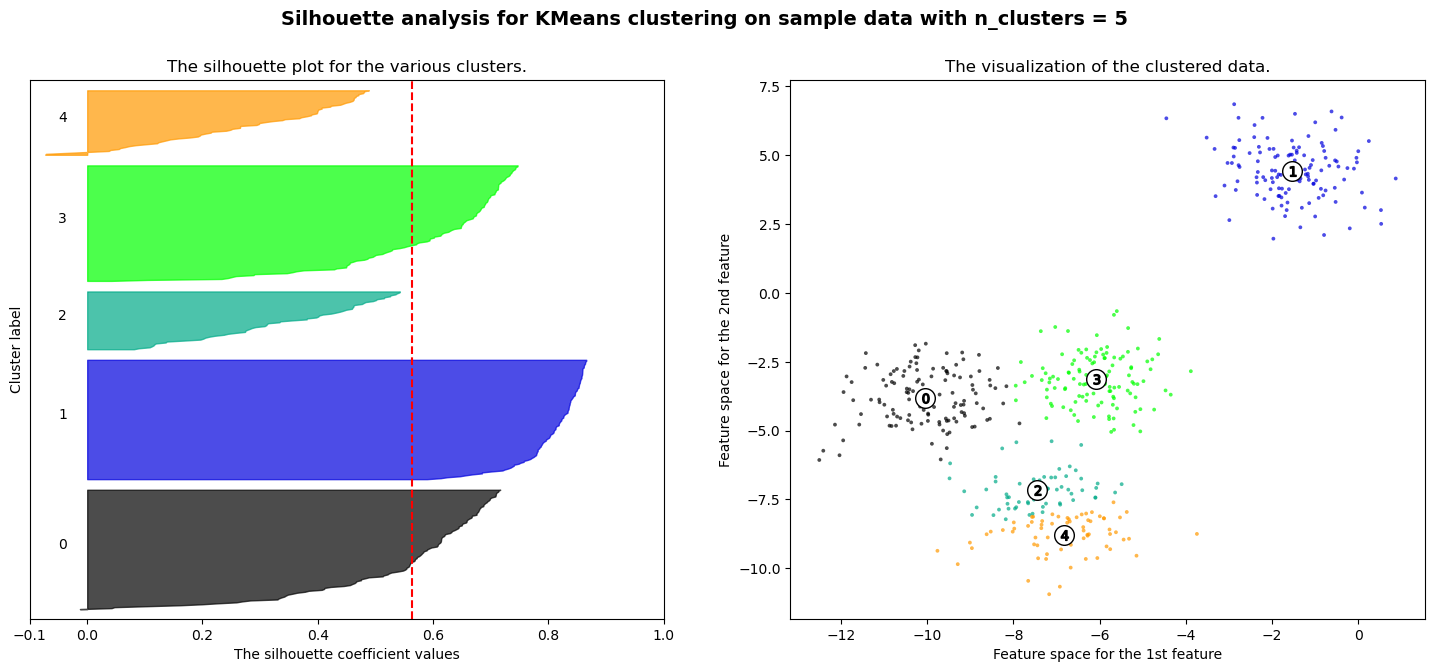

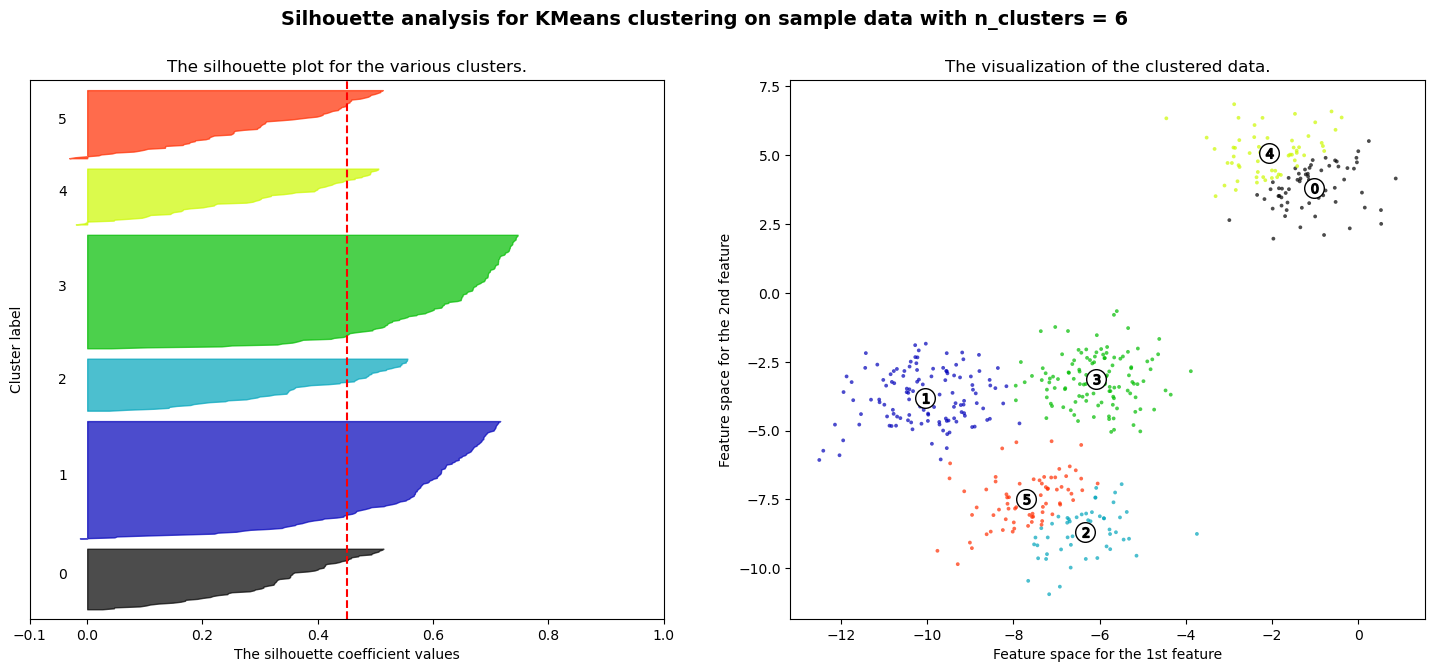

In [29]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

- From the elbow chart it is clear our k value should be 4.
- But as per the silhouette score when k = 2 the score is higher. Should we just like that decide the k value from the silhouette score ? We should not. 
- Look at the cluster graphs properly and for k = 3, 5, 6,  there seems to be some kind of negative values. Negative silhouette scores. Therefore should not decide k value only from the silhouette score. 
- Now we have k = 2 or k = 4. In such situations always go for **higher value**. Compare the graphs of k = 2 and k = 4. Obviously k = 4 suits better. Therefore we choose k = 4. 
- The red dotted lines in the graphs is the silhouette score.

# ---------------------------------------------------------------------------------------------------------------
[Go to Contents](#Contents)

# 2. DB Scan

In [3]:
df = pd.read_csv(r'F:\datasets\Mall_Customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [14]:
# only using 3nd and 4th features

x = df.iloc[:, [3,4]].values              # taking only the values, does not include feature names and the output is an array
print(len(x))
print()
print(x)

200

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59

In [8]:
# importing algorithm

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 4)        # epsilons = 3, minpts = 4

In [10]:
# fitting the model

db_model = dbscan.fit(x)
labels = db_model.labels_

In [11]:
# these are the outliers and noise

labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [12]:
# identifying the core points 

sample_core = np.zeros_like(labels, dtype = bool)
sample_core[dbscan.core_sample_indices_] = True

In [16]:
# True refers to the core point.   Compare this array with x array to find the data points where True is given.

sample_core

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [18]:
# calculating the number of clusters

clusters = len(set(labels)) - (1 if -1 in labels else 0)
clusters

9

In [22]:
# validating the model

from sklearn import metrics 
sil_score = metrics.silhouette_score(x, labels)
sil_score

-0.1908319132560097

# ---------------------------------------------------------------------------------------------------------------
[Go to Contents](#Contents)

# Dimensionality Reduction

# Principle Component Analysis

In [5]:
## loading the dataset

from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()

In [6]:
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
## looking at the data 

cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [9]:
print(cancer_dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
## converting array to dataframe

cancer_df = pd.DataFrame(cancer_dataset['data'], columns = cancer_dataset['feature_names'])
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [15]:
## Standardizing the data

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [16]:
Scaler.fit(cancer_df)

StandardScaler()

In [18]:
scaled_data = Scaler.transform(cancer_df)
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [20]:
# Importing PCA algorithm

from sklearn.decomposition import PCA
pca = PCA(n_components=2)                    ## creating only 2 features 

In [22]:
data_pca = pca.fit_transform(scaled_data)
data_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

- The dataset contains totally 30 features and after applying PCA it now has only 2 features. Amazing right?

In [23]:
pca.explained_variance_

array([13.30499079,  5.7013746 ])

- The above is the variance that is getting captured with respect to all the features.
- As we already know that var(PCA1) >> var(PCA2).

In [24]:
# without mentioning the n_components parameter

pca1 = PCA()

In [26]:
data_pca1 = pca1.fit_transform(scaled_data)
data_pca1

array([[ 9.19283683e+00,  1.94858307e+00, -1.12316616e+00, ...,
        -3.39144536e-02,  4.56477199e-02, -4.71692081e-02],
       [ 2.38780180e+00, -3.76817174e+00, -5.29292687e-01, ...,
         3.26241827e-02, -5.68742432e-03, -1.86787626e-03],
       [ 5.73389628e+00, -1.07517380e+00, -5.51747593e-01, ...,
         4.70258247e-02,  3.14589659e-03,  7.50534755e-04],
       ...,
       [ 1.25617928e+00, -1.90229671e+00,  5.62730526e-01, ...,
        -2.57775589e-03,  6.70621179e-03,  3.77041667e-03],
       [ 1.03747941e+01,  1.67201011e+00, -1.87702933e+00, ...,
        -6.80863833e-02, -8.41632764e-02, -2.37828222e-02],
       [-5.47524330e+00, -6.70636791e-01,  1.49044308e+00, ...,
        -9.51587894e-03, -6.09131090e-02, -1.94755854e-02]])

- We can see now that there is no change in the number of features, the dataset still has 30 features.

In [27]:
pca1.explained_variance_

array([1.33049908e+01, 5.70137460e+00, 2.82291016e+00, 1.98412752e+00,
       1.65163324e+00, 1.20948224e+00, 6.76408882e-01, 4.77456255e-01,
       4.17628782e-01, 3.51310875e-01, 2.94433153e-01, 2.61621161e-01,
       2.41782421e-01, 1.57286149e-01, 9.43006956e-02, 8.00034045e-02,
       5.95036135e-02, 5.27114222e-02, 4.95647002e-02, 3.12142606e-02,
       3.00256631e-02, 2.74877113e-02, 2.43836914e-02, 1.80867940e-02,
       1.55085271e-02, 8.19203712e-03, 6.91261258e-03, 1.59213600e-03,
       7.50121413e-04, 1.33279057e-04])

- There will be 30 different variance for each feature
- It is the variance that is getting captured with respect to all the 30 features.

Text(0, 0.5, 'Second Principle Component')

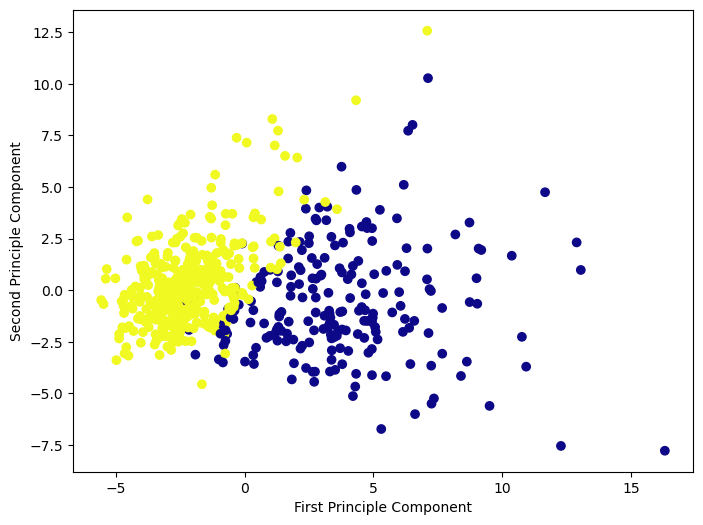

In [28]:
# visualizing pca_data

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c = cancer_dataset['target'], cmap = 'plasma')
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

- The 30D data is now converted into 2D with maximum variance being captured.
- Now we can even solve classification problem with the extracted features.

# ---------------------------------------------------------------------------------------------------------------
[Go to Contents](#Contents)

# Additional Information

- When you use cross_val_score, its not necessary to manually fit(x_train, y_train), cross_val_score will take care of the fit process automatically.  
- Even if you fit(x_train, y_train) before cross_val_score its not an issue.  
- Look at the codes below. 1st code doesn't fit(x_train, y_train) and 2nd code fit(x_train, y_train) before cross_val_score.  
  
- **1st code**
```python
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Create a Lasso regressor object
lasso = Lasso()

# Perform cross-validation to calculate mean squared error
mse = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate the mean of the mean squared errors
mean_mse = np.mean(mse)

print("Mean Squared Error:", -mean_mse) 
```  
    
    
- **2nd code**
  
```python
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Create a Lasso regressor object
lasso = Lasso()

# Fit the Lasso model to the training data
lasso.fit(X_train_scaled, y_train)

# Perform cross-validation to calculate mean squared error
mse = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)

# Calculate the mean of the mean squared errors  
mean_mse = np.mean(mse)  
  
print("Mean Squared Error:"    , -mean actual MSE
